In [1]:
import scipy.integrate as sci
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import matplotlib


# plt.style.use('classic')
# plt.style.use('bmh')
print(plt.style.available)
plt.rc('font', family='Times New Roman', size=30)
plt.rc('axes', linewidth=2)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['mathtext.fontset'] = 'cm'

plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 2

plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.minor.width'] = 2

d=0.20285625840961555
au2cm=2.1947e5
# energy_list=[0.278284,0.278284]
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 30,
}




#设置横纵坐标的名称以及对应字体格式
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 40,
}



font3 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 46
}
color_list=['#0000FF','#FF0000','#FFC000','#00CED1','#F20687','#454545','#454545']

au2cm =219474.63

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


var is 0
nsteps used 2001
dt used 4
w used 0.0008
var is 1
nsteps used 2001
dt used 4
w used 0.0008
var is 2
nsteps used 2001
dt used 4
w used 0.0008
var is 3
nsteps used 2001
dt used 4
w used 0.0008


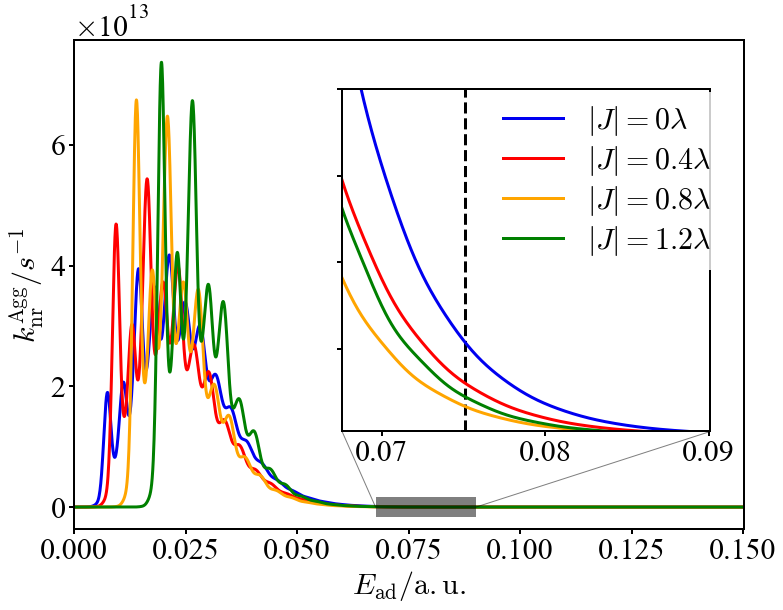

In [2]:
a_list=[]
a_list.append(np.load('../data/azulene/dimer-0j/test.npz')['ACF'])
a_list.append(np.load('../data/azulene/dimer-0.4j/test.npz')['ACF'])
a_list.append(np.load('../data/azulene/dimer-0.8j/test.npz')['ACF'])
a_list.append(np.load('../data/azulene/dimer-1.2j/test.npz')['ACF'])



a_length = len(a_list)
integral_broad_list = []


e_ad = 0.07509
e_list =np.linspace(-1*e_ad,3*e_ad,5000)

spectra_list =[]

for var in range(0,a_length):
    print('var is %d' % var)
    a_orignal = a_list[var].copy()
    a = np.array(a_orignal.copy())
    
    dt = 0.1*100/2.4188  
    nsteps = int(len(a))
    print('nsteps used %d' % nsteps)
    print('dt used %d' % dt)
    n = 8
    
    w= 0.0001*n
    print('w used %g' % w)

    num =np.array([dt*i for i in range(nsteps)])          
    spectra_list.append(np.array([sci.trapz(a*np.exp(num*1j*(e))*np.exp(-(w**2)*(num**2)/2),x=num) for e in e_list]).real)
    integral_broad_list.append(sci.cumtrapz(a*np.exp(-(w**2)*(num**2)/2),x=num).real)

color_list=['#0000F0','#FF0000','orange','green','#F20687','#454545']



fig1,ax1=plt.subplots(figsize=(12,9))
ax1.plot((e_list+e_ad)/1,spectra_list[0]*2*(1/2.4188)*1e17,label='$|J|=0 \lambda$',c=color_list[0])
ax1.plot((e_list+e_ad)/1,spectra_list[1]*2*(1/2.4188)*1e17,label='$|J|=0.4 \lambda $',c=color_list[1])
ax1.plot((e_list+e_ad)/1,spectra_list[2]*2*(1/2.4188)*1e17,label='$|J|=0.8 \lambda $',c=color_list[2])
ax1.plot((e_list+e_ad)/1,spectra_list[3]*2*(1/2.4188)*1e17,label='$|J|=1.2 \lambda $',c=color_list[3])
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
ax1.set_xlim(0,2*e_ad)
leg1=ax1.legend(prop=font1,bbox_to_anchor=(0.6, 0.5),labelspacing=0.2)
leg1.get_frame().set_linewidth(0.0)
ax1.set_xlabel('$E_\mathrm{ad}/ \mathrm{a.u.}$')
ax1.set_ylabel('$k_\mathrm{nr}^\mathrm{Agg}/s^{-1}$')
    
axins = ax1.inset_axes([0.4, 0.2, 0.55, 0.7])
x1, x2, y1, y2 = 0.9*e_ad, 1.2*e_ad, 1e9, 8e10
axins.plot((e_list+e_ad)/1,spectra_list[0]*2*(1/2.4188)*1e17,label='$|J|=0 \lambda$',c=color_list[0])
axins.plot((e_list+e_ad)/1,spectra_list[1]*2*(1/2.4188)*1e17,label='$|J|=0.4 \lambda $',c=color_list[1])
axins.plot((e_list+e_ad)/1,spectra_list[2]*2*(1/2.4188)*1e17,label='$|J|=0.8 \lambda $',c=color_list[2])
axins.plot((e_list+e_ad)/1,spectra_list[3]*2*(1/2.4188)*1e17,label='$|J|=1.2 \lambda $',c=color_list[3])
axins.vlines(x=1*e_ad,ymin=1.1e9,ymax=7.99e10,ls='--',color='black')
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_yticklabels([])
ax1.indicate_inset_zoom(axins, edgecolor="black",lw=20)
fig1.savefig('FIG.4a.png',bbox_inches='tight')
fig1.savefig('FIG.4a.pdf',bbox_inches='tight')